# TAREFA 2 - CIÊNCIA DE DADOS
##### ALUNO: JULIO CESAR RANGEL

### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

### AQUISIÇÃO DOS DADOS

In [2]:
dataset = pd.read_csv('consumo_cerveja.csv')
dataset.head(2)

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1,3,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1,4,2


### QUESTÃO 1

In [3]:
consumo_sem = dataset.groupby('dia_semana')['Consumo_de_cerveja_litros'].mean()
consumo_du = consumo_sem[consumo_sem.index < 5]
consumo_fs = consumo_sem[consumo_sem.index > 4]

semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

###### GRAFICO DE BARRAS

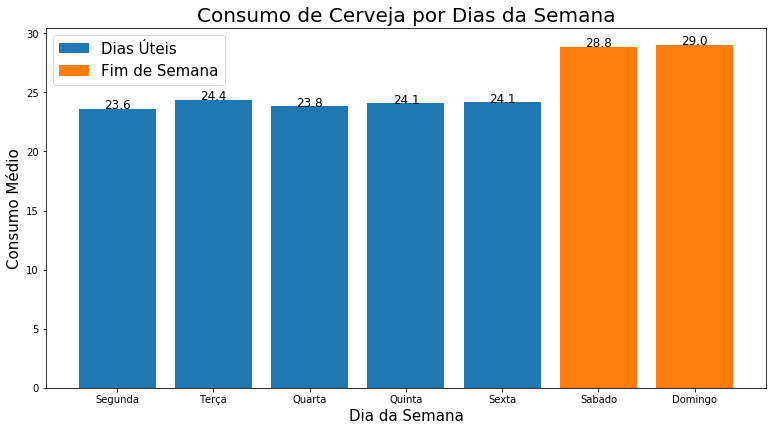

In [4]:
fig = plt.figure(figsize=(10,5))
eixos = fig.add_axes([0, 0, 1, 1])

indice_du = range(len(consumo_du))
indice_fs = range(len(consumo_du), len(consumo_sem))

eixos.bar(indice_du, consumo_du)
eixos.bar(indice_fs, consumo_fs)
for i in indice_du:
        eixos.text(i,consumo_du[i],consumo_du[i].round(1), fontsize=12, ha='center')
for i in indice_fs:
        eixos.text(i,consumo_fs[i],consumo_fs[i].round(1), fontsize=12, ha='center')
eixos.set_title('Consumo de Cerveja por Dias da Semana', fontsize=20)
eixos.set_xlabel('Dia da Semana', fontsize=15)
eixos.set_ylabel('Consumo Médio', fontsize=15)
eixos.set_xticks(range(len(consumo_sem)))
eixos.set_xticklabels(semana)
eixos.legend(['Dias Úteis', 'Fim de Semana'], fontsize=15, loc='best')

plt.show()

###### GRAFICO DE PIZZA

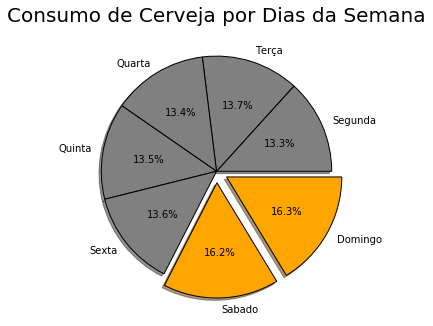

In [5]:
fig = plt.figure(figsize=(5,4))
eixos = fig.add_axes([0, 0, 1, 1])

cor = ['gray','gray','gray','gray','gray','orange','orange']
exp = [0,0,0,0,0,0.1,0.1]

eixos.pie(consumo_sem, labels=semana, explode=exp, shadow = True,
          autopct='%.1f%%', colors = cor, wedgeprops = {'edgecolor': 'k'})
eixos.set_title('Consumo de Cerveja por Dias da Semana', fontsize=20)

plt.show()

### QUESTÃO 2

In [6]:
total_mes = dataset.groupby('mes')['Consumo_de_cerveja_litros'].sum()

indice_mes = range(1,len(total_mes)+1)

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

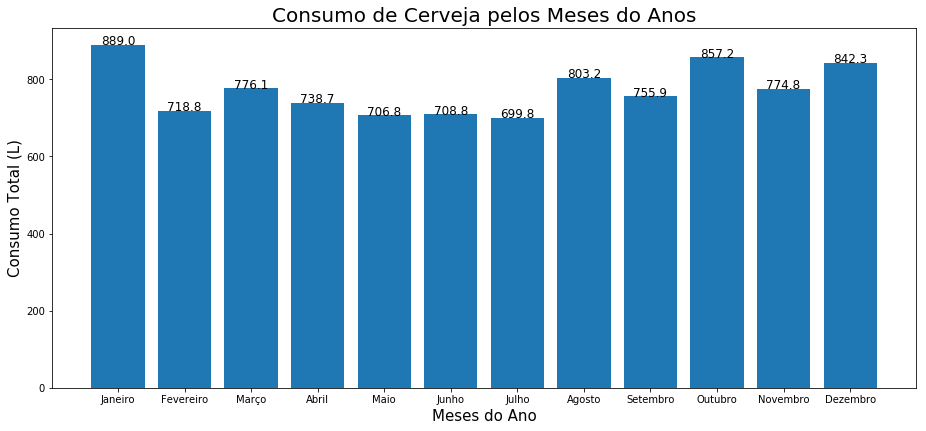

In [15]:
fig = plt.figure(figsize=(12,5))
eixos = fig.add_axes([0, 0, 1, 1])

eixos.bar(indice_mes, total_mes)

for i in indice_mes:
        eixos.text(i,total_mes[i],total_mes[i].round(1), fontsize=12, ha='center')

eixos.set_title('Consumo de Cerveja pelos Meses do Anos', fontsize=20)
eixos.set_xlabel('Meses do Ano', fontsize=15)
eixos.set_ylabel('Consumo Total (L)', fontsize=15)
eixos.set_xticks(indice_mes)
eixos.set_xticklabels(meses)

plt.show()

### QUESTÃO 3

In [8]:
temp_mes = dataset.groupby('mes')['Temperatura_Media_C'].mean()
precip_mes = dataset.groupby('mes')['Precipitacao_mm'].mean()
consumo_mes = dataset.groupby('mes')['Consumo_de_cerveja_litros'].mean()

#### PLOTAGEM

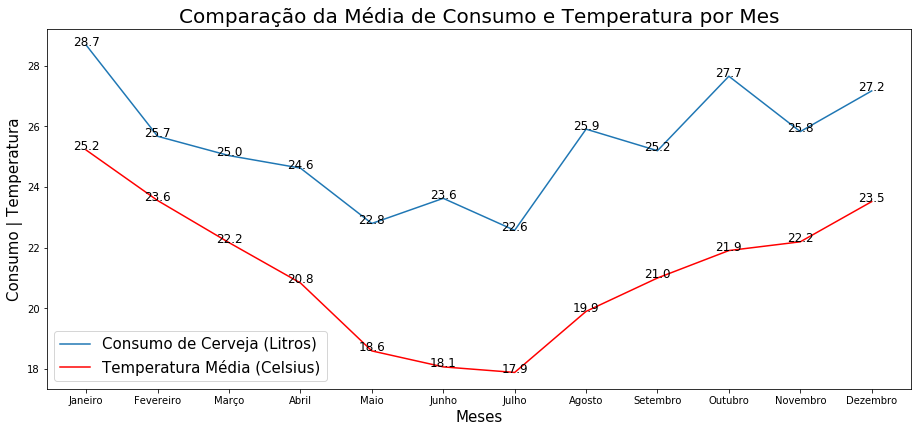

In [9]:
fig = plt.figure(figsize=(12,5))
eixos = fig.add_axes([0, 0, 1, 1])

eixos.plot(indice_mes, consumo_mes)
eixos.plot(indice_mes, temp_mes, color='r')

for i in indice_mes:
    eixos.text(i, consumo_mes[i], consumo_mes[i].round(1), fontsize=12, ha='center')
    eixos.text(i, temp_mes[i], temp_mes[i].round(1), fontsize=12, ha='center')

eixos.set_title('Comparação da Média de Consumo e Temperatura por Mes', fontsize=20)
eixos.set_xlabel('Meses', fontsize=15)
eixos.set_ylabel('Consumo | Temperatura', fontsize=15)
eixos.set_xticks(indice_mes)
eixos.set_xticklabels(meses)
eixos.legend(['Consumo de Cerveja (Litros)', 'Temperatura Média (Celsius)'], fontsize=15, loc='best')

plt.show()

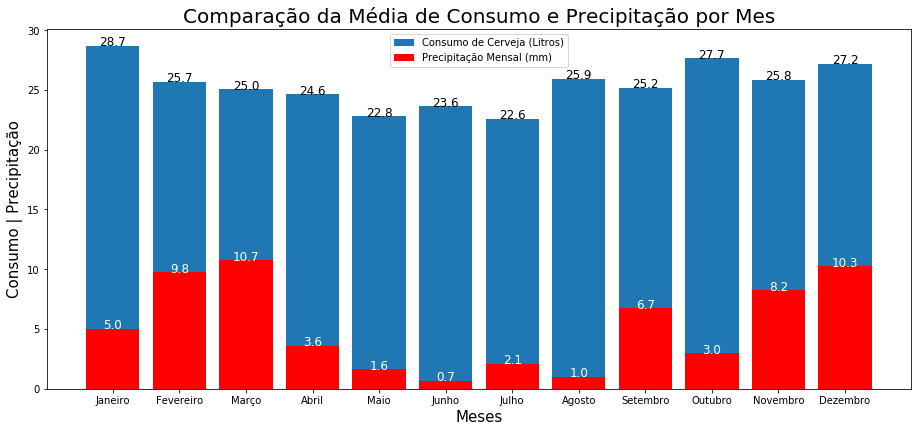

In [10]:
fig = plt.figure(figsize=(12,5))
eixos = fig.add_axes([0, 0, 1, 1])

eixos.bar(indice_mes, consumo_mes)
eixos.bar(indice_mes, precip_mes, color='r')

for i in indice_mes:
    eixos.text(i, consumo_mes[i], consumo_mes[i].round(1), fontsize=12, ha='center')
    eixos.text(i, precip_mes[i], precip_mes[i].round(1), fontsize=12, ha='center', color='w')

eixos.set_title('Comparação da Média de Consumo e Precipitação por Mes', fontsize=20)
eixos.set_xlabel('Meses', fontsize=15)
eixos.set_ylabel('Consumo | Precipitação', fontsize=15)
eixos.set_xticks(indice_mes)
eixos.set_xticklabels(meses)
eixos.legend(['Consumo de Cerveja (Litros)', 'Precipitação Mensal (mm)'], fontsize=10, loc='best')

plt.show()

### QUESTÃO 4

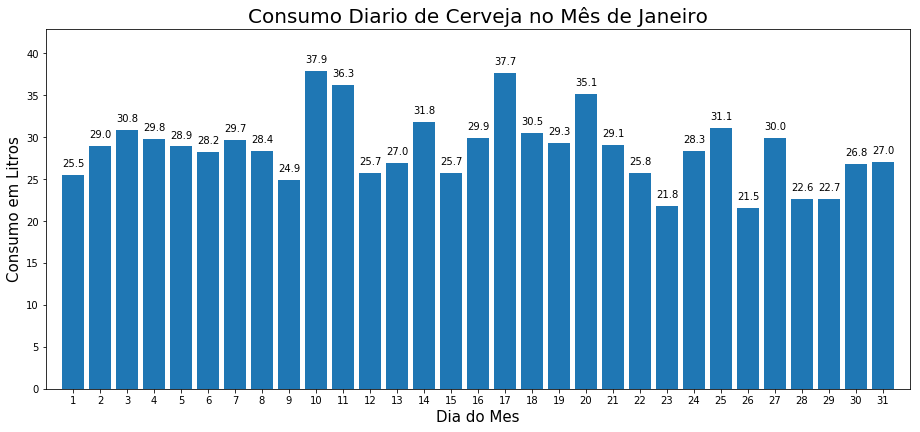

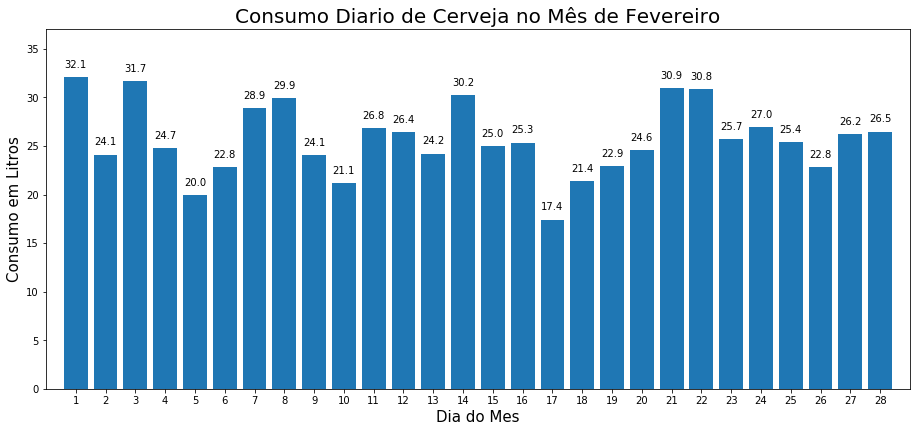

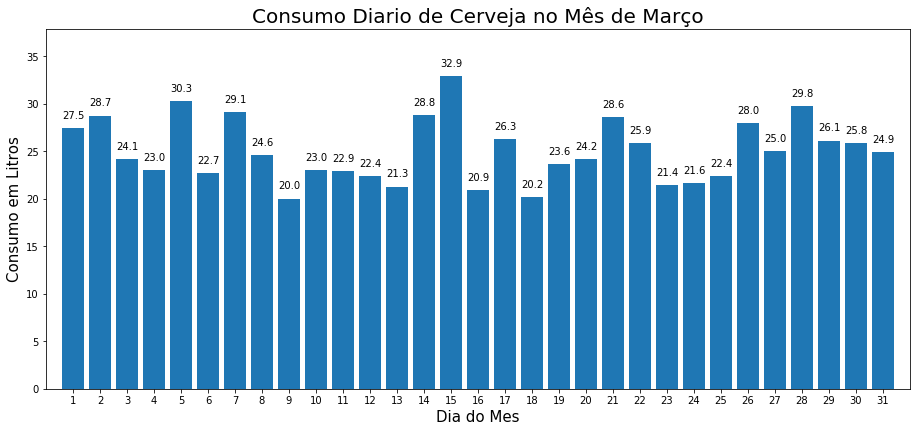

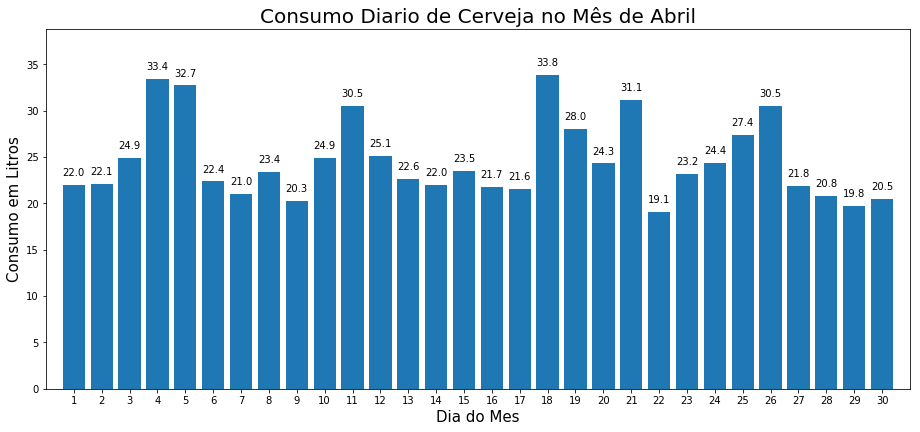

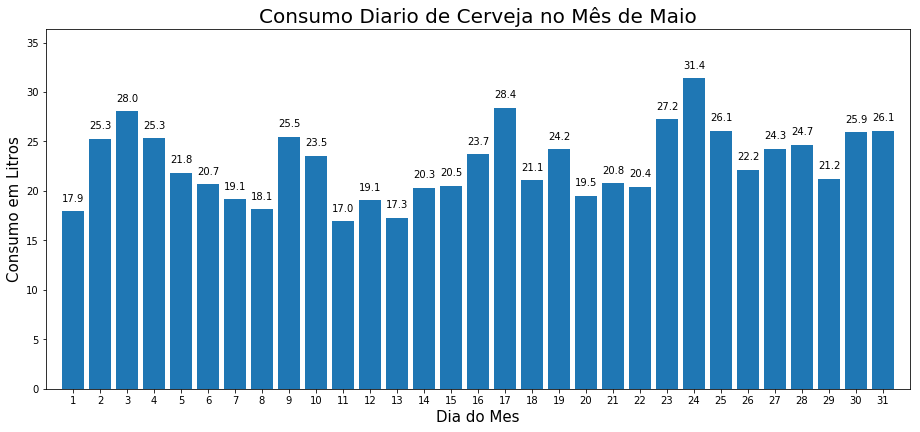

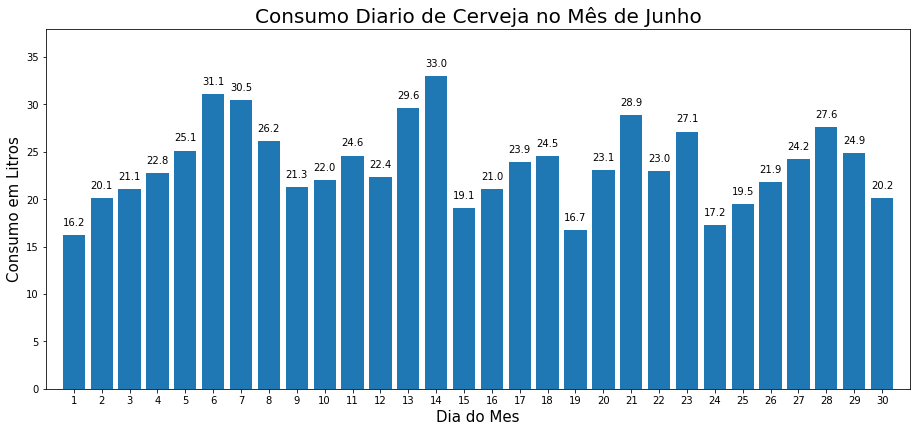

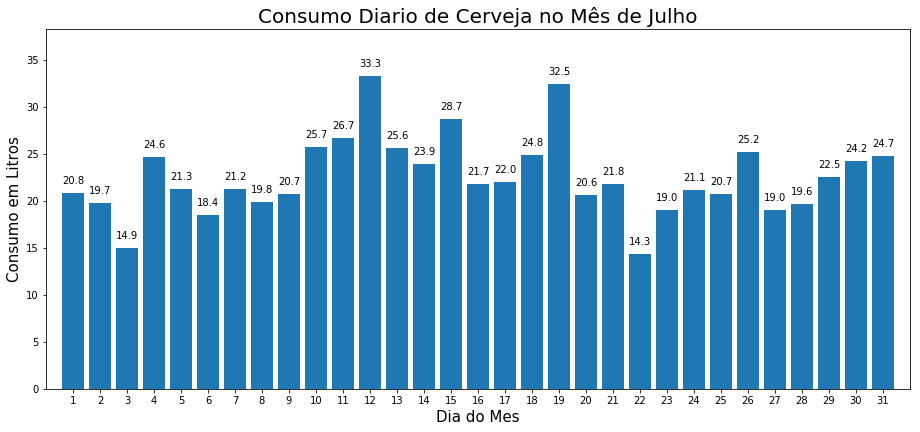

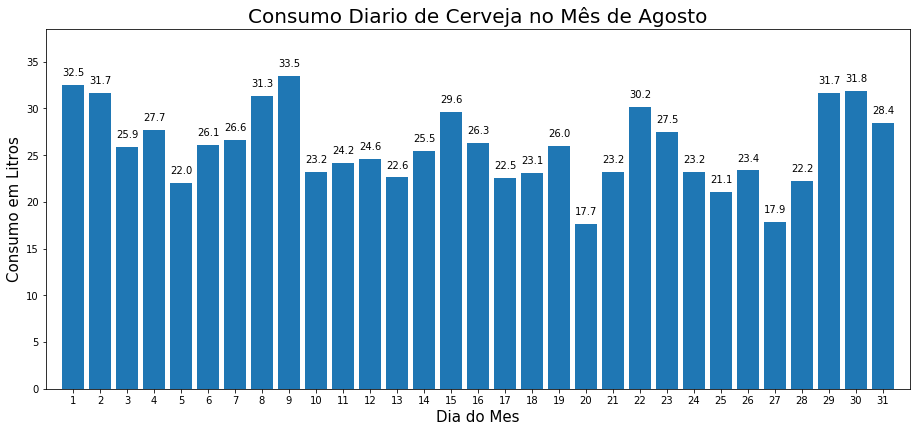

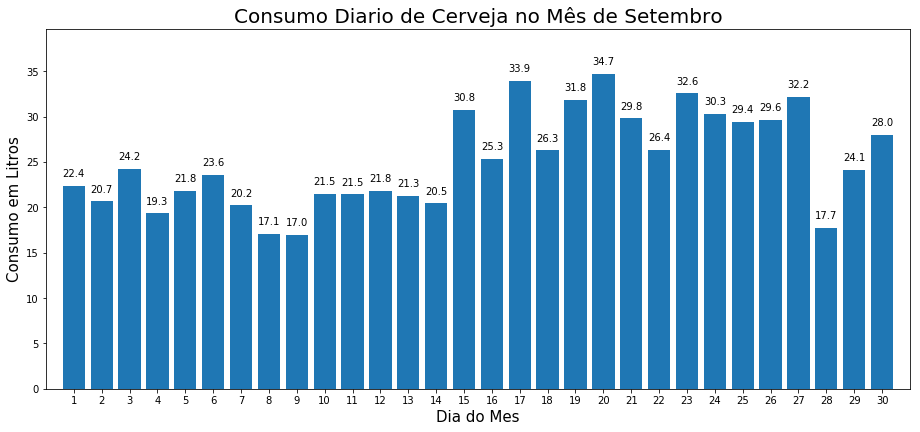

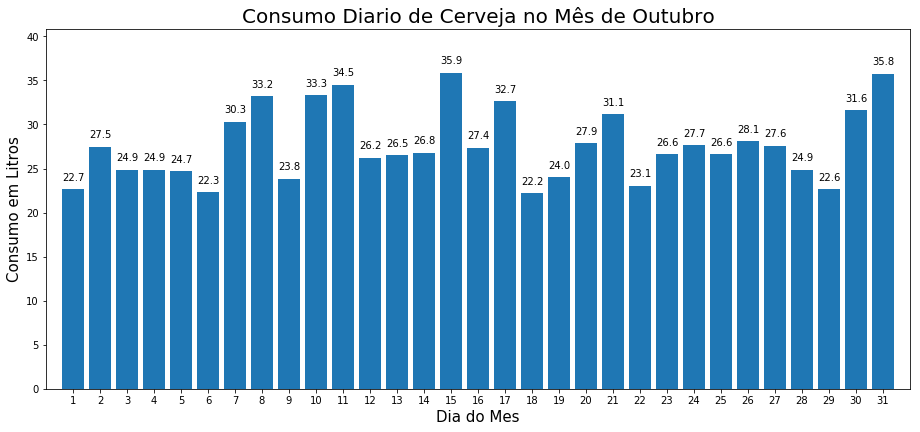

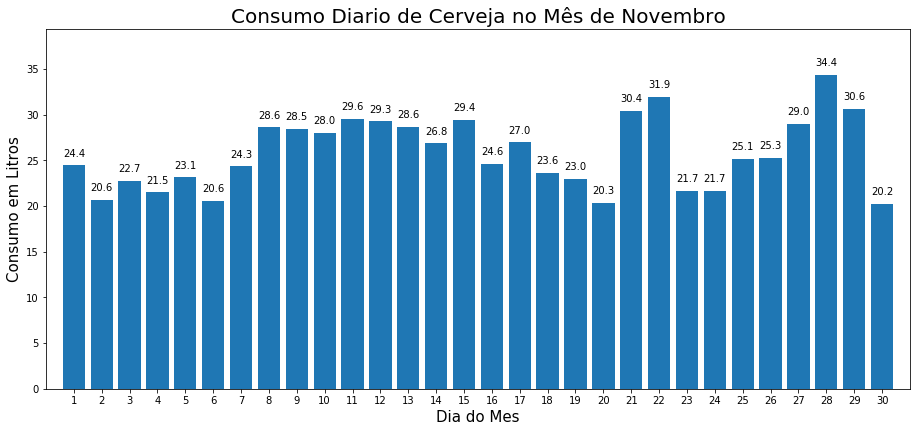

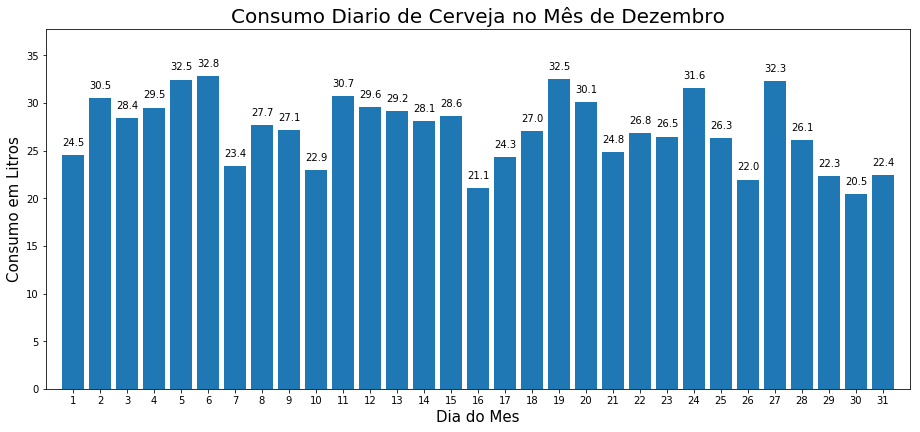

In [11]:
for x in indice_mes:
    consumo_diario = dataset[dataset['mes'] == x]['Consumo_de_cerveja_litros']
    consumo_diario.index = range(1,len(consumo_diario)+1)
    
    fig = plt.figure(figsize=(12,5))
    eixos = fig.add_axes([0, 0, 1, 1])
    
    eixos.bar(consumo_diario.index, consumo_diario)
    
    for i in consumo_diario.index:
        eixos.text(i, consumo_diario[i]+1, consumo_diario[i].round(1), fontsize=10, ha='center')
        
    eixos.set_xlim(0,len(consumo_diario)+1)
    eixos.set_ylim(0,consumo_diario.max()+5)
    eixos.set_title('Consumo Diario de Cerveja no Mês de '+meses[x-1], fontsize=20)
    eixos.set_xlabel('Dia do Mes', fontsize=15)
    eixos.set_ylabel('Consumo em Litros', fontsize=15)
    eixos.set_xticks(consumo_diario.index)
    eixos.set_xticklabels(consumo_diario.index)
    
    #fig.savefig(str(x)+'.png', bbox_inches='tight')
    plt.show()